# Visulalisation

In [31]:
import pandas as pd
import seaborn as sns

In [32]:
# Load DataFrame
import pickle
path = './data/df_resultsold.pickle'
with open(path, 'rb') as f:
    df_results = pickle.load(f)

In [33]:
df_results.index = df_results.index.rename('loss_name', level=4)

In [34]:
df_results = (df_results.reset_index()
                        .dropna())

In [35]:
df_results.dropna()

,method,eta,epsilon,n_steps,loss_name,loss,accuracy
10,pgd_infinity,0.003922,0.007843,2,mean_squared_error,3.200266,0.3333
11,pgd_infinity,0.003922,0.007843,2,categorical_crossentropy,3.383821,0.3347
12,pgd_infinity,0.003922,0.007843,4,mean_squared_error,3.443647,0.2995
13,pgd_infinity,0.003922,0.007843,4,categorical_crossentropy,3.736819,0.3012
14,pgd_infinity,0.003922,0.007843,6,mean_squared_error,3.520656,0.2890
...,...,...,...,...,...,...,...
3145,pgd_l2_random,0.031373,0.035294,6,categorical_crossentropy,0.882088,0.7427
3146,pgd_l2_random,0.031373,0.035294,8,mean_squared_error,0.898517,0.7437
3147,pgd_l2_random,0.031373,0.035294,8,categorical_crossentropy,0.882483,0.7417
3148,pgd_l2_random,0.031373,0.035294,1,mean_squared_error,0.902991,0.7413


## Desired format :

In [37]:
# Sanity check
(df_results.epsilon < df_results.eta).sum()
df_results[df_results.epsilon == 0].sum()

method       0.0
eta          0.0
epsilon      0.0
n_steps      0.0
loss_name    0.0
loss         0.0
accuracy     0.0
dtype: float64

In [38]:
# Rename PGD n_step == 1 to FGSM
# These are FGSM since FGSM is PGD with n_step =1
mask_fgsm = df_results.n_steps == 1
df_results.loc[mask_fgsm, 'method', ] = (df_results.loc[mask_fgsm, 'method']
                                                       .str
                                                       .replace('pgd', 'fgsm'))

In [43]:
df_results = df_results.loc[~df_results.method.str.contains('l2')]

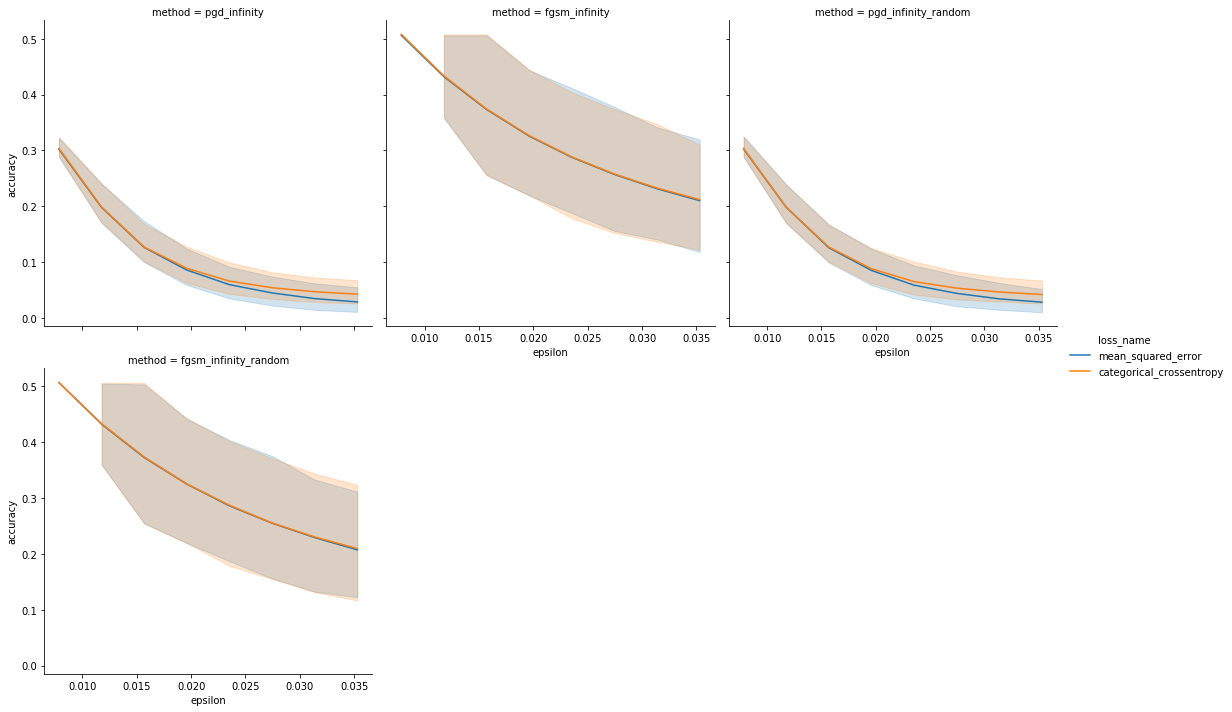

In [44]:
g = sns.relplot(x="epsilon", y="accuracy",
                 col="method", hue='loss_name', col_wrap=3,
                 kind="line", data=df_results.reset_index())

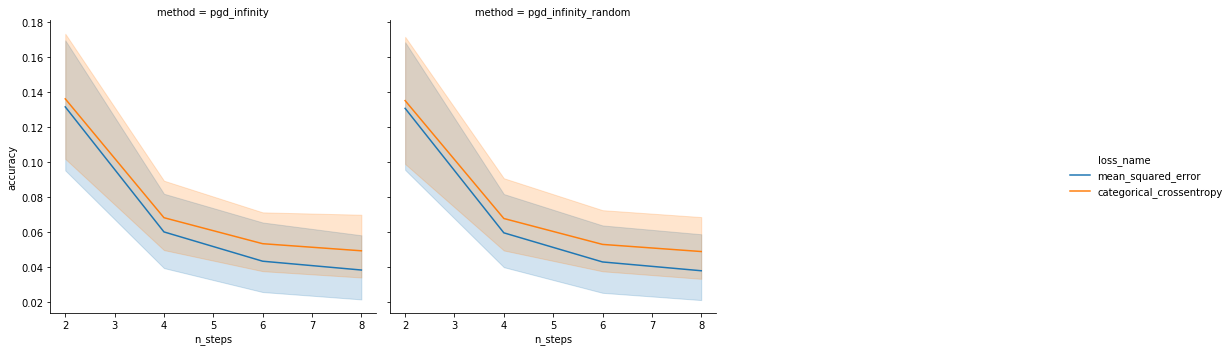

In [49]:
g = sns.relplot(x="n_steps", y="accuracy",
                 col="method", hue='loss_name', col_wrap=3,
                 kind="line", data=df_results.loc[~(df_results.n_steps == 1)])

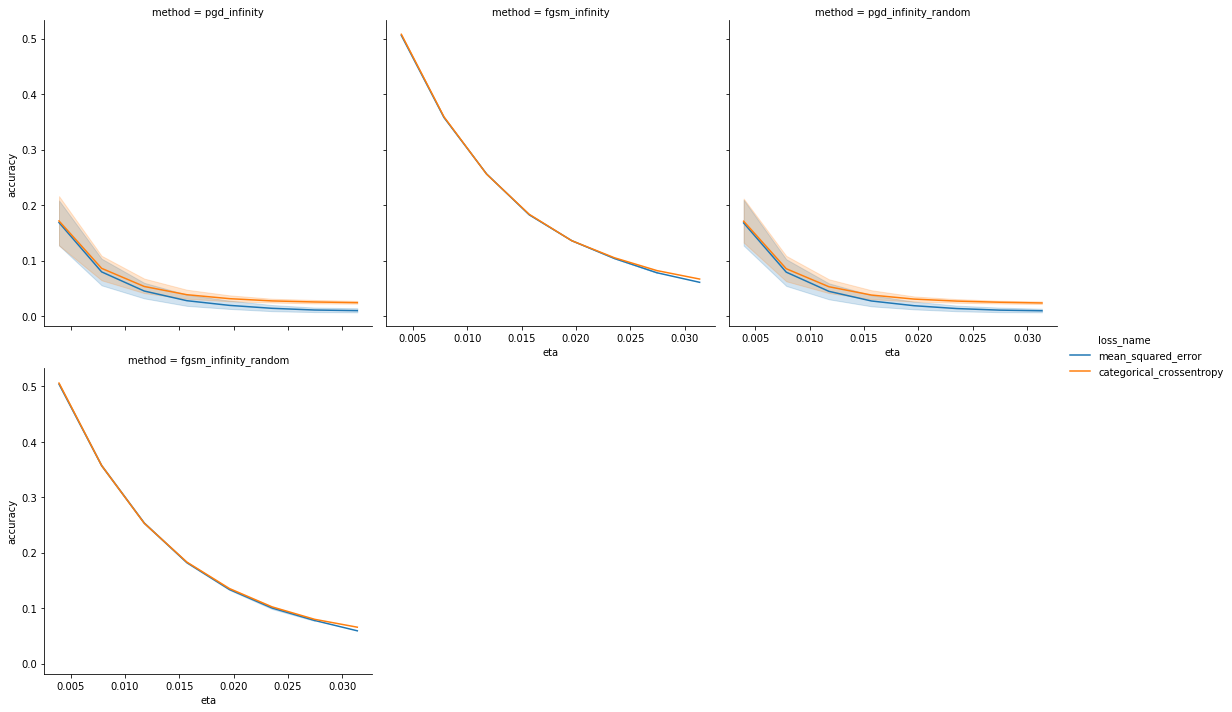

In [46]:
g = sns.relplot(x="eta", y="accuracy",
                 col="method", col_wrap=3, hue='loss_name',
                 kind="line", data=df_results.reset_index())